# Comparisons, Mask, and Boolean Logic

## Conting Rainy Days

In [1]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumpY array
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0 # 1/10mm -> inches
inches.shape

(365,)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

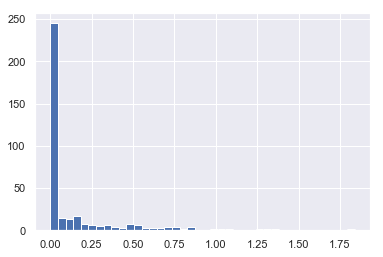

In [7]:
plt.hist(inches, 40)

### Digging into the data

To get more datas, like how many rainy days were there in the year? What is the avarage precipitation on those rainy days? How many days were there with more than half an inch of rain? we could use loops and increment a counter, but this wold be inefficient, so, let's use NumPy

## Comparasion Operators as ufuncs

In [9]:
x = np.array([1, 2, 3, 4, 5])

In [10]:
x < 3 # less than

array([ True,  True, False, False, False])

In [11]:
x > 3

array([False, False, False,  True,  True])

In [12]:
x <= 3

array([ True,  True,  True, False, False])

In [13]:
x >= 3

array([False, False,  True,  True,  True])

In [14]:
x != 3

array([ True,  True, False,  True,  True])

In [15]:
x == 3

array([False, False,  True, False, False])

In [16]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [17]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [18]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays

In [19]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Counting entries

To count number of True entries in a Boolean array -> no.count_nonzero

In [20]:
# How many values less than 6?
np.count_nonzero(x < 6)

8

np.sum could be used too, since True = 1 and False = 0

In [21]:
np.sum(x < 6)

8

In [22]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

to now if any or all values are True, np.any or np.all could be used

In [23]:
# are there any values greater than 8?
np.any(x > 8)

True

In [24]:
# are there any values less than zero?
np.any(x < 0)

False

In [25]:
# are all values less than 10?
np.all(x < 10)

True

In [26]:
# are there all values euqal to 6?
np.all(x == 6)

False

they can be used along particular axes as well

In [27]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

### Boolean operators

Operators as 'and' and 'or' don't work, so you have to use &, |, ^, and ~

In [29]:
np.sum((inches > 0.5) & (inches < 1))

29

Equivalence from logic course

In [33]:
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

* &----np.bitwise_and  
* |----np.bitwise_or
* ^----np.bitwise_xor   
* ~----np.bitwise_not

In [35]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches:  ", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches:   75


## Boolean Arrays as Masks

In [36]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [37]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

To get an array of all values that are less than 5:

In [38]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [39]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip of rainy days in 2014 (inches):   ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~ summer]))

Median precip of rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


## Aside: Using the Keywords and/or Versus the Operators &/|

In [40]:
bool(42), bool(0)

(True, False)

In [41]:
bool(42 and 0)

False

In [42]:
bool(42 or 0)

True

& ans | on integers operates on the bits of the alement, applying the and or ther or to the inidvidual bits

In [43]:
bin(42)

'0b101010'

In [44]:
bin(59)

'0b111011'

In [45]:
bin(42 & 59)

'0b101010'

In [46]:
bin(42 | 59)

'0b111011'

In [47]:
bin(42^59)

'0b10001'

In [48]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [49]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [50]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [51]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()